<a href="https://colab.research.google.com/github/bhagya-prog/Handwritten-Digit-Classifier/blob/main/MNIST_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the below code, I am all important modules needed for the model creation and then using with all variations of hyperparamaters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

Impoting the data from datasets of keras... MNIST has been imported

In [ ]:
from tensorflow.keras.datasets import mnist

Dividing the data into train and test data in the ratio of 6:1

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Checking for null/NaN values if present

In [ ]:
print("Checking for missing values...")
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

print("Missing values in x_train:", np.isnan(x_train).sum())
print("Missing values in y_train:", np.isnan(y_train).sum())
print("Missing values in x_test:", np.isnan(x_test).sum())
print("Missing values in y_test:", np.isnan(y_test).sum())

Checking for missing values...
x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)
Missing values in x_train: 0
Missing values in y_train: 0
Missing values in x_test: 0
Missing values in y_test: 0


Checking if the data set is correctly labelled or not for the 10 values only. This makes it clear that our data set perfectly labelled, hence can be used on the model

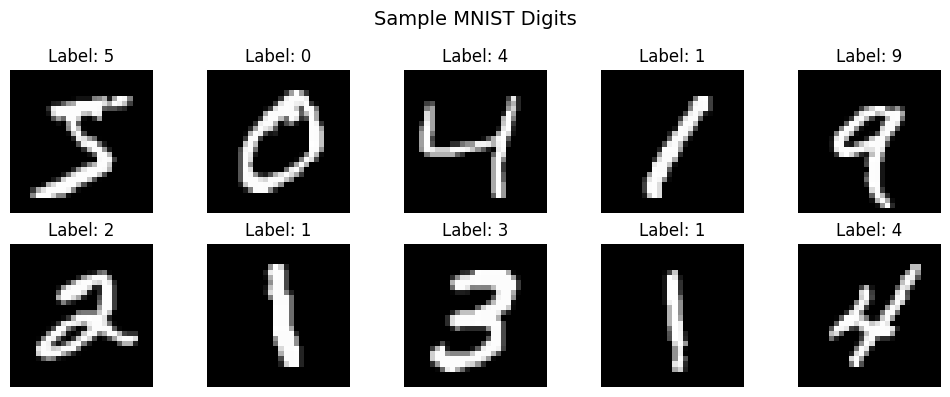

In [ ]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits", fontsize=14)
plt.tight_layout()
plt.show()

Now, checking if the distribution of values is consistent or not. So, that the output is not biased towards one value.

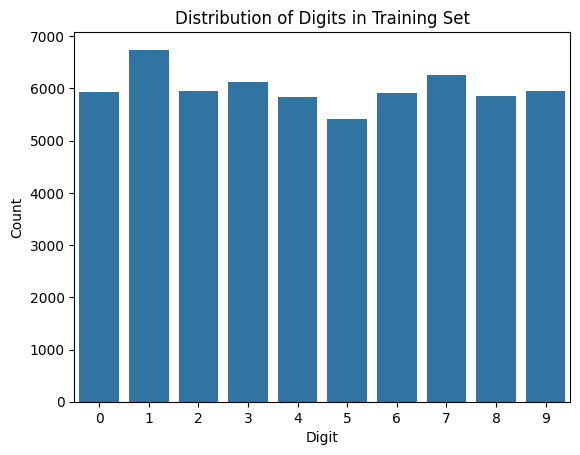

In [ ]:
sns.countplot(x=y_train)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In the below code, I am creating a function which can be used on all the possible combinations in my projects... and hence I can get a perfect output stats with table, graphs and the best model.

In [ ]:
def build_and_train_model(epochs, layers, neurons, activation, optimizer):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    for _ in range(layers):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        validation_split=0.1,
                        verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    return test_acc, history


Using itertools, so that I can get all the possible combinations (72) on its own without much of hardwork to be done from my side...

In [ ]:
from itertools import product

epochs_list = [5, 10, 20]
layers_list = [1, 2]
neurons_list = [64, 128, 256]
activations = ['relu', 'tanh']
optimizers = ['adam', 'sgd']

configs = list(product(epochs_list, layers_list, neurons_list, activations, optimizers))

results = []
for i, config in enumerate(configs, 1):
    acc, hist = build_and_train_model(*config)
    results.append((config, acc))
    print(f"#{i:02d} Config: {config} -> Test Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#01 Config: (5, 1, 64, 'relu', 'adam') -> Test Accuracy: 0.9722
#02 Config: (5, 1, 64, 'relu', 'sgd') -> Test Accuracy: 0.9349
#03 Config: (5, 1, 64, 'tanh', 'adam') -> Test Accuracy: 0.9676
#04 Config: (5, 1, 64, 'tanh', 'sgd') -> Test Accuracy: 0.9283
#05 Config: (5, 1, 128, 'relu', 'adam') -> Test Accuracy: 0.9766
#06 Config: (5, 1, 128, 'relu', 'sgd') -> Test Accuracy: 0.9369
#07 Config: (5, 1, 128, 'tanh', 'adam') -> Test Accuracy: 0.9755
#08 Config: (5, 1, 128, 'tanh', 'sgd') -> Test Accuracy: 0.9262
#09 Config: (5, 1, 256, 'relu', 'adam') -> Test Accuracy: 0.9780
#10 Config: (5, 1, 256, 'relu', 'sgd') -> Test Accuracy: 0.9382
#11 Config: (5, 1, 256, 'tanh', 'adam') -> Test Accuracy: 0.9753
#12 Config: (5, 1, 256, 'tanh', 'sgd') -> Test Accuracy: 0.9248
#13 Config: (5, 2, 64, 'relu', 'adam') -> Test Accuracy: 0.9686
#14 Config: (5, 2, 64, 'relu', 'sgd') -> Test Accuracy: 0.9434
#15 Config: (5, 2, 64, 'tanh', 'adam') -> Test Accuracy: 0.9677
#16 Config: (5, 2, 64, 'tanh', 'sgd') -

Now, the datasets that I have trained using all the combinations will be saved in a dataframe which will be used for finding the best combo and also plotting the graphs as needed...

In [ ]:
import pandas as pd

df = pd.DataFrame([{
    'Epochs': c[0],
    'Layers': c[1],
    'Neurons': c[2],
    'Activation': c[3],
    'Optimizer': c[4],
    'Test Accuracy (%)': round(a * 100, 2)
} for c, a in results])


***THE BEST ACCURACY IS OF THE MODEL AS SHOWN BELOW... Epochs = 20, Layers = 2, Neurons = 128, Activation = relu, Optimizer = adam... Accuracy being 98.23***

In [ ]:
best_model_row = df.loc[df['Test Accuracy (%)'].idxmax()]
print("🔥 Best Model Configuration:\n")
print(best_model_row)


🔥 Best Model Configuration:

Epochs                  20
Layers                   2
Neurons                128
Activation            relu
Optimizer             adam
Test Accuracy (%)    98.23
Name: 64, dtype: object


Now, first ploting the graphs between **Test Accuracy VS Epochs**.. This graphs shows that the highest accuracy ranges were in the case of 20 epohs... Ranging between 97-98... And which can be confirmed from the best model as well.

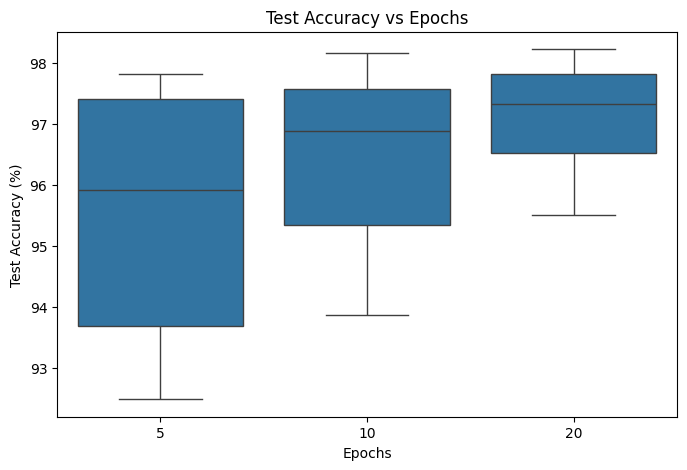

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Epochs', y='Test Accuracy (%)', data=df)
plt.title('Test Accuracy vs Epochs')
plt.show()


The second plot is of **Layers VS Test Accuracy**.. I got to know that if the number of layers were 2, the accuracy had a better range of 96-98 as compared to that of 1... Which can also be confirmed from the best model.

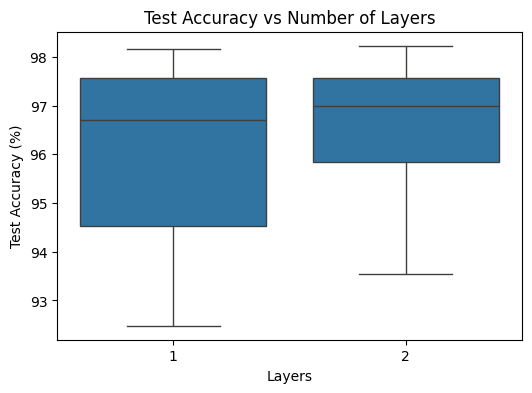

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Layers', y='Test Accuracy (%)', data=df)
plt.title('Test Accuracy vs Number of Layers')
plt.show()


Now, plotting Test **Accuracy VS Activation Function**. There was no doubt that relu was better.. And it was confirmed via the graphs and the best model output as well. Relu is better than tanh in this case...

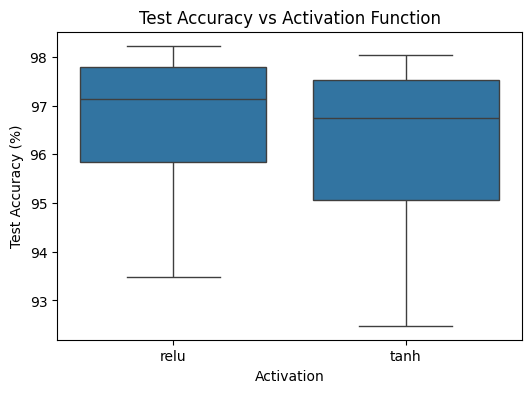

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Activation', y='Test Accuracy (%)', data=df)
plt.title('Test Accuracy vs Activation Function')
plt.show()


Now, plotting **Test Accuracy VS Optimizer** and from the graph it is clear that the best one is ADAM... It has an accuracy range of more than 97 in each case.. Though SGD has an accuracy less than 96. So, yes Optimizer does affect the accuracy...

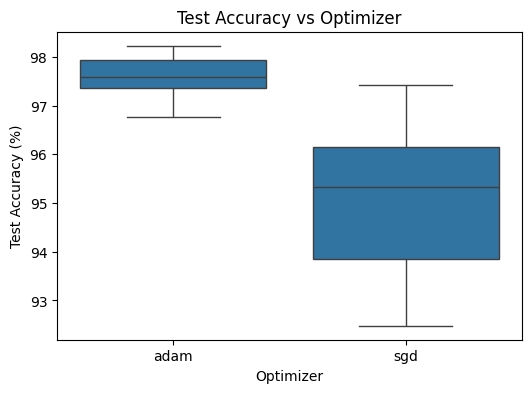

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Optimizer', y='Test Accuracy (%)', data=df)
plt.title('Test Accuracy vs Optimizer')
plt.show()


Now, the below plot which is Acuracy Heatmap : Neurons VS Epochs... This provides us visual representation that how accuracy changes with Neurons and Epochs. This heatmap is a clear representation of how Epochs and Neurons both matter in the accuracy calculation of a model...

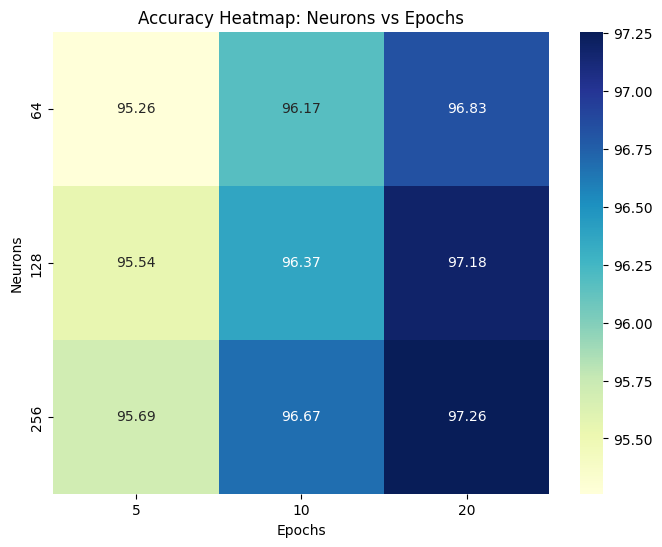

In [ ]:
pivot_table = df.pivot_table(
    values='Test Accuracy (%)',
    index='Neurons',
    columns='Epochs',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Accuracy Heatmap: Neurons vs Epochs")
plt.show()


In [ ]:
print(df)

    Epochs  Layers  Neurons Activation Optimizer  Test Accuracy (%)
0        5       1       64       relu      adam              97.22
1        5       1       64       relu       sgd              93.49
2        5       1       64       tanh      adam              96.76
3        5       1       64       tanh       sgd              92.83
4        5       1      128       relu      adam              97.66
..     ...     ...      ...        ...       ...                ...
67      20       2      128       tanh       sgd              96.60
68      20       2      256       relu      adam              97.99
69      20       2      256       relu       sgd              97.43
70      20       2      256       tanh      adam              97.73
71      20       2      256       tanh       sgd              96.72

[72 rows x 6 columns]


In [ ]:
print("✅ Total Models Trained:", len(df))
print("\n🔥 Best Accuracy Achieved:", best_model_row['Test Accuracy (%)'], "%")
print("\n🏆 Best Configuration:")
print(best_model_row)

✅ Total Models Trained: 72

🔥 Best Accuracy Achieved: 98.23 %

🏆 Best Configuration:
Epochs                  20
Layers                   2
Neurons                128
Activation            relu
Optimizer             adam
Test Accuracy (%)    98.23
Name: 64, dtype: object
